Project 4 Project
Recommendations of Movies

In [1]:
import pandas as pd

In [2]:
movies = pd.read_csv('ml-latest-small/movies.csv')
links = pd.read_csv('ml-latest-small/links.csv')
ratings = pd.read_csv('ml-latest-small/ratings.csv')
tags = pd.read_csv('ml-latest-small/tags.csv')

Brief Look at each dataset

In [3]:
# Contains the movies name and genre for the movie
# Movie ID is not needed in this project
movies.info()
movies.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
 # No use for this project but can be used to find the movie on the websites
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [5]:
# User based ratings and time of when they were posted
# Time needs to be converted to be used reasonably
# User have multiple reviews and doesn't review just one movie
ratings.info()
ratings.head()
ratings.groupby('userId', group_keys= ratings['userId'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [6]:
# 610 users 
display(ratings['userId'].unique())
ratings.describe()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [7]:
# Users place tags that the user find useful or the main idea of the movie. 
# Possible tag to add along with the genres?
tags.info()
tags.head()
len(tags['userId'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


58

In [8]:
for dataset in [movies, ratings, tags]:
    if(dataset.isna().sum().sum() > 1):
        print("Missing values found")
    else:
        print("No missing values")

No missing values
No missing values
No missing values


In [9]:
if(len(tags['userId'].unique()) != len(ratings['userId'].unique())):
    print("Not all user who gave a rating, also gave a tag")


Not all user who gave a rating, also gave a tag


<AxesSubplot:ylabel='Frequency'>

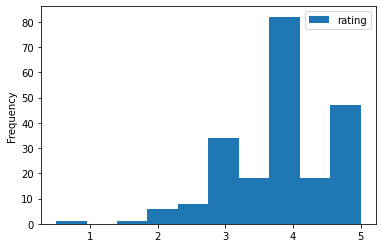

In [10]:
ratings[['movieId', 'rating']].loc[ratings.movieId == 1].plot(x = 'movieId', y= 'rating', kind='hist')

In [26]:
grouped_movies = ratings.groupby('movieId').count()

In [27]:
grouped_movies.mean()

userId       10.369807
rating       10.369807
timestamp    10.369807
dtype: float64

In [ ]:
ratings.rating.unique()

In [59]:
grouped_user = ratings.groupby('userId')[['rating']].count()

In [60]:
grouped_user

,rating
userId,
1,232
2,29
3,39
4,216
5,44
...,...
606,1115
607,187
608,831


In [61]:
len(grouped_user.loc[grouped_user['rating']>grouped_user['rating'].mean()])

157

In [73]:
outliers_users_high= grouped_user.loc[grouped_user['rating']> 3*grouped_user['rating'].std()]

In [80]:
outliers_users_high.index

Int64Index([ 68, 177, 182, 232, 249, 274, 288, 298, 307, 318, 380, 387, 414,
            448, 474, 480, 599, 603, 606, 608, 610],
           dtype='int64', name='userId')

In [75]:
outliers_users_high['rating'].sum()

26663

In [85]:
ratings['rating'].loc[ratings['userId'] == 68].value_counts()

3.0    299
3.5    279
4.0    187
2.5    156
2.0    118
4.5    113
5.0     51
1.0     28
1.5     21
0.5      8
Name: rating, dtype: int64